In [79]:
from langchain_openai import ChatOpenAI


model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [80]:
from langchain_core.prompts import ChatPromptTemplate

poetry_prompt = ChatPromptTemplate.from_messages([
    ("system", """
     You are a helpful assistant that generates poetry. If User gives you a programming language name like python, you write a poem about it. If User gives you a not related to programming language, You Just say "It's not related to programming language".
     """),
    ("user", "Generate a poem about {language}."),
])

poetry_chain = poetry_prompt | model


In [81]:
# poetry_chain.invoke("language": "python"})

In [82]:
explain_prompt = ChatPromptTemplate.from_messages([
    ("system", """
     You are a helpful assistant that explains poetry.
     """),
    ("user", "Explain the poetry. poetry: {poetry}"),
])

explain_chain = explain_prompt | model

In [83]:
# explain_chain.invoke({"poetry": "In the realm of code, where logic flows,  \nA serpent slithers, as knowledge grows.  \nWith elegance wrapped in simplicity's guise,  \nPython emerges, a programmer's prize.  \n\nIndentations dance, like a waltz in the night,  \nEach line a whisper, each function a light.  \nFrom data analysis to web's vast expanse,  \nIn Python's embrace, we find our chance.  \n\nLibraries flourish, like flowers in spring,  \nNumPy and Pandas, oh, the joy they bring!  \nWith Django and Flask, the web comes alive,  \nIn this vibrant ecosystem, our ideas thrive.  \n\nObject-oriented, yet functional too,  \nA language so versatile, it welcomes the new.  \nFrom scripts that automate to games that delight,  \nPython, dear Python, you shine ever bright.  \n\nSo here's to the code, both simple and grand,  \nTo the community thriving, a united band.  \nIn the world of programming, you hold the key,  \nOh Python, sweet Python, forever you'll be!  "})

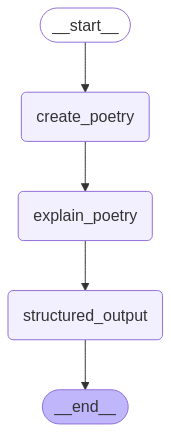

In [84]:
from typing_extensions import TypedDict
from langgraph.graph import START, StateGraph, END

class State(TypedDict):
    language: str
    poetry: str
    explanation: str

def create_poetry(state: State):
    poetry = poetry_chain.invoke({"language": state["language"]})
    return {"poetry": poetry.content}

def explain_poetry(state: State):
    explanation = explain_chain.invoke({"poetry": state["poetry"]})
    return {"explanation": explanation.content}

def structured_output(state: State):
    return {"poetry": state["poetry"], "explanation": state["explanation"]}

graph_builder = StateGraph(State)

graph_builder.add_node(create_poetry)
graph_builder.add_node(explain_poetry)
graph_builder.add_node(structured_output)

graph_builder.set_entry_point("create_poetry")
graph_builder.add_edge("create_poetry", "explain_poetry")
graph_builder.add_edge("explain_poetry", "structured_output")
graph_builder.add_edge("structured_output", END)

graph = graph_builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [85]:
input_language = "javascript"

graph.invoke({"language": input_language})

{'language': 'javascript',
 'poetry': "In the realm of the web, where the magic unfolds,  \nJavaScript dances, its story retold.  \nWith curly braces and functions so bright,  \nIt brings life to the pages, igniting the light.  \n\nFrom simple alerts to complex arrays,  \nIt weaves through the code in a myriad of ways.  \nWith each line of logic, it breathes and it grows,  \nCreating the wonders that every user knows.  \n\nAsynchronous whispers, promises made,  \nIn the heart of the browser, its power displayed.  \nWith frameworks like React and Angular's might,  \nIt shapes user journeys, both day and night.  \n\nSo here's to the language that runs in our veins,  \nWith every keystroke, it breaks all the chains.  \nJavaScript, oh JavaScript, forever you'll reign,  \nIn the world of the web, your legacy remains.",
 'explanation': 'This poem celebrates the programming language JavaScript and its vital role in web development. Let\'s break it down stanza by stanza:\n\n### Stanza 1:\n**"I